In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('C:\\Users\\yogesh\\Downloads\\archive (1)\\winequalityN.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\yogesh\\Downloads\\archive (1)\\winequalityN.csv'

In [ ]:
print(df)

In [6]:
print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [15]:
df=df.replace('[^\d.]','',regex=True)

In [16]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [50]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [52]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [53]:
for col in df.columns:
    if df[col].isnull().sum()>0:
        df[col]=df[col].fillna(df[col].mean())
        df.isnull().sum().sum()

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

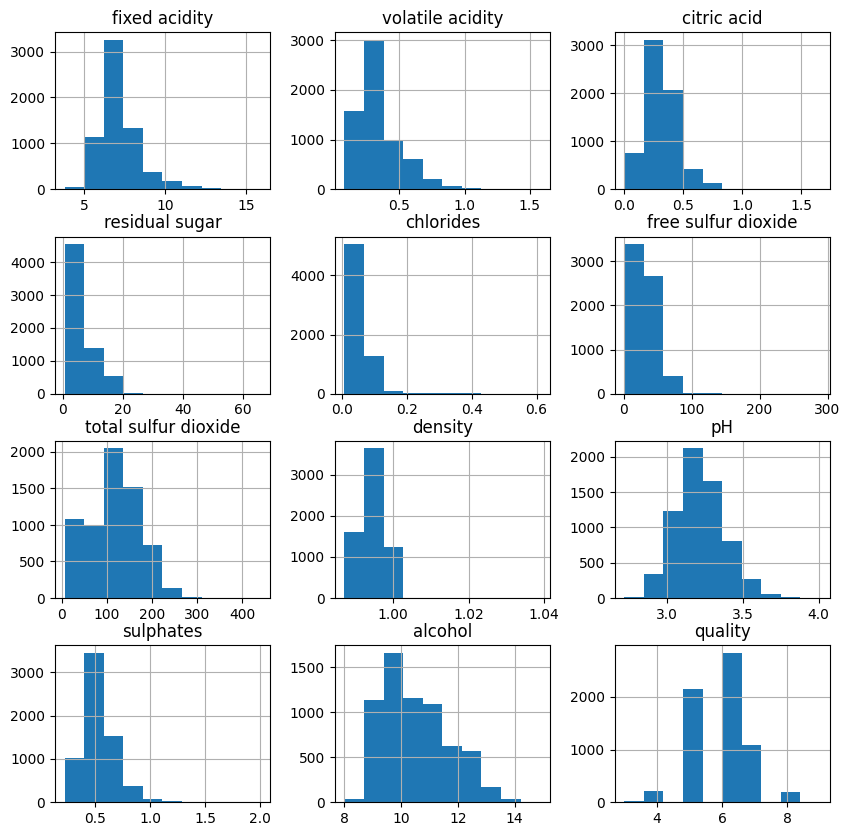

In [58]:
df.hist(figsize=(10,10))

In [1]:
plt.bar(df['quality'],df['alcohol'],color='blue')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

NameError: name 'plt' is not defined

In [54]:
subset_df=df[['quality','alcohol','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates']]
subset_df.corr()

,quality,alcohol,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
quality,1.000000,0.444319,-0.077031,-0.265953,0.085706,-0.036825,-0.200886,0.055463,-0.041385,-0.305858,0.019366,0.038729
alcohol,0.444319,1.000000,-0.095603,-0.038248,-0.010433,-0.359706,-0.256861,-0.179838,-0.265740,-0.686745,0.121002,-0.003261
fixed acidity,-0.077031,-0.095603,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380
volatile acidity,-0.265953,-0.038248,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476
citric acid,0.085706,-0.010433,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613
residual sugar,-0.036825,-0.359706,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745
chlorides,-0.200886,-0.256861,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332
free sulfur dioxide,0.055463,-0.179838,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489
total sulfur dioxide,-0.041385,-0.265740,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381
density,-0.305858,-0.686745,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454


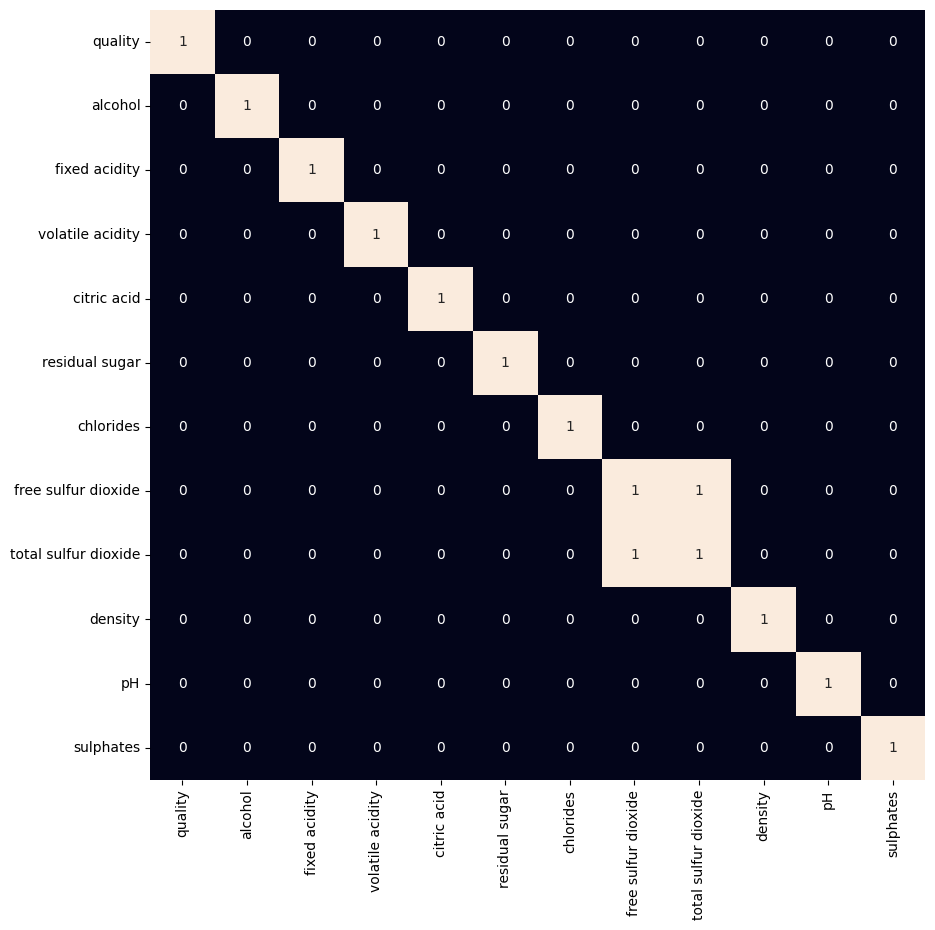

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(subset_df.corr()>0.7, annot=True, cbar=False)
plt.show()

In [78]:
df=df.drop('total sulfur dioxide', axis=1)

In [79]:
df['best quality']=[1 if x>5 else 0 for x in df.quality]

In [82]:
df.replace({'white':1,'red':0},inplace=True)

In [85]:
features=df.drop(['quality','best quality'],axis=1)
target=df['best quality']
xtrain,xtest,ytrain,ytest=train_test_split(
    features,target,test_size=0.2,random_state=40)
xtrain.shape,xtest.shape


((5197, 11), (1300, 11))

In [87]:
norm=MinMaxScaler()
xtrain=norm.fit_transform(xtrain)
xtest=norm.transform(xtest)


In [90]:
models=[LogisticRegression(),XGBClassifiesr(),SVC(kernel='rbf')]
for i in range(3):
    models[i].fit(xtrain,ytrain)
    print(f'{models[i]}:')
    print('Training Accuracy:',metrics.roc_auc_score(ytrain,models[i].predict(xtrain)))
    print('Validation Accuracy:',metrics.roc_auc_score(yte,models[i].predict(xtest)))
print()    
    

NameError: name 'XGBClassifiesr' is not defined

In [94]:
metrics.plot_cofusion_matrix(models[1],xtest,ytest)
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_cofusion_matrix'

In [25]:
print(metrics.classification_report(ytest,models[1].predict(xtest)))

NameError: name 'ytest' is not defined